In [1]:
import numpy as np

# A matrix of shape (3, 3)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# A vector of shape (1, 3)
vector = np.array([10, 20, 30])

# Broadcasting the vector across the matrix
result = matrix + vector

print(result)


[[11 22 33]
 [14 25 36]
 [17 28 39]]


In [2]:
vector.shape

(3,)

In [12]:
vector = np.array([[10, 20, 30]])
result = matrix + vector
print(result)
print(vector.shape)

[[11 22 33]
 [14 25 36]
 [17 28 39]]
(1, 3)


In [14]:
vt = vector.T
vt.shape

(3, 1)

In [15]:
vt + matrix

array([[11, 12, 13],
       [24, 25, 26],
       [37, 38, 39]])

In [18]:
v5 = np.array([10,20,30,40,50])
print(v5.shape)
v5 + matrix

(5,)


ValueError: operands could not be broadcast together with shapes (5,) (3,3) 

In [19]:
v5 = np.array([[10,20,30,40,50]])
print(v5.shape)
v5 + matrix

(1, 5)


ValueError: operands could not be broadcast together with shapes (1,5) (3,3) 

In [20]:
v5 = np.array([[10],[20],[30]])
print(v5.shape)
v5 + matrix

(3, 1)


array([[11, 12, 13],
       [24, 25, 26],
       [37, 38, 39]])

In [21]:
v5 = np.array([[10],[20],[30],[40],[50]])
print(v5.shape)
v5 + matrix

(5, 1)


ValueError: operands could not be broadcast together with shapes (5,1) (3,3) 


Exercise 2-1.
The online code repository is “missing” code to create Figure 2-2. (It’s not really missing—I moved it into the solution to this exercise.) So, your goal here is to write your own code to produce Figure 2-2.

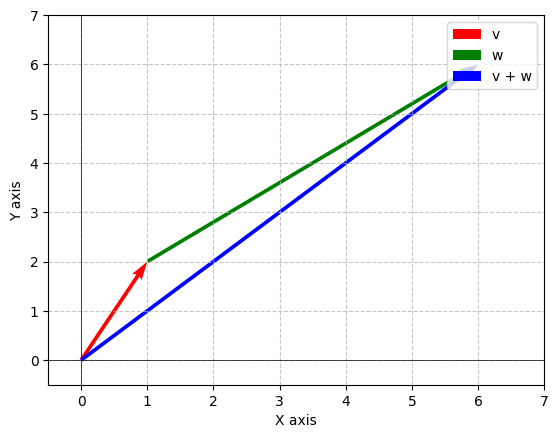

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
v = np.array([1, 2])
w = np.array([5, 4])
result = v + w

# Create a plot
fig, ax = plt.subplots()

# Plot vector v (from origin)
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='v')

# Plot vector w (from tip of v)
ax.quiver(v[0], v[1], w[0], w[1], angles='xy', scale_units='xy', scale=1, color='g', label='w')

# Plot resultant vector v + w (from origin to tip of w)
ax.quiver(0, 0, result[0], result[1], angles='xy', scale_units='xy', scale=1, color='b', label='v + w')

# Adjust the limits of the plot to fit the vectors
ax.set_xlim([-0.5, 7])
ax.set_ylim([-0.5, 7])

# Add grid and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show plot
plt.show()

[-3  8]


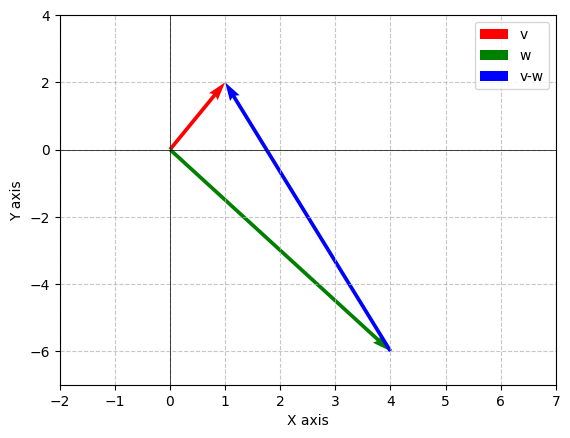

In [21]:
v = np.array([1,2])
w = np.array([4,-6])
result = v-w
print(result)

fig,ax = plt.subplots()
ax.quiver(0,0,v[0],v[1],angles='xy',scale_units='xy',scale=1,color='r',label='v')
ax.quiver(0,0,w[0],w[1],angles='xy',scale_units='xy',scale=1,color='g',label='w')
ax.quiver(w[0],w[1],result[0],result[1],angles='xy',scale_units='xy',scale=1,color='b',label='v-w')
ax.set_xlim([-2,7])
ax.set_ylim([-7,4])
plt.grid(True,linestyle='--',alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

Q2. Write an algorithm that computes the norm of a vector by translating Equation 2-7 into code. Confirm, using random vectors with different dimensionalities and orientations, that you get the same result as np.linalg.norm(). This exercise is designed to give you more experience with indexing NumPy arrays and translating formulas into code; in practice, it’s often easier to use np.linalg.norm().  


Equation 2-7. The norm of a vector
∥v∥=∑n v2 i=1 i


In [31]:
v = np.array([1,2,3,4])
len(v)

4

In [37]:
def vec_magnitude(v):
    sum = 0
    for i in range(len(v)):
      v2 = v[i]**2
      sum = sum + v2
    return np.sqrt(sum)

vec_magnitude(v)

5.477225575051661

In [33]:
np.linalg.norm(v)

5.477225575051661

Q3. Create a Python function that will take a vector as input and output a unit vector in the same direction. What happens when you input the zeros vector?

In [39]:
unit_vec = v/vec_magnitude(v)
print(unit_vec)

[0.18257419 0.36514837 0.54772256 0.73029674]


Q4. You know how to create unit vectors; what if you want to create a vector of any arbitrary magnitude? Write a Python function that will take a vector and a desired magnitude as inputs and will return a vector in the same direction but with a magnitude corresponding to the second input.

In [44]:
desired_magnitude = 10
vec = np.array([2,3,5])

def scale_vector(vector, desired_magnitude):
    if np.linalg.norm(vector) == 0:
        return vector
    else:
      current_magnitude = np.linalg.norm(vector)
      scaling_factor = desired_magnitude / current_magnitude
      scaled_vector = vector * scaling_factor
      return scaled_vector

scaled_vector = scale_vector(vec, desired_magnitude)
print(scaled_vector)


[3.24442842 4.86664263 8.11107106]


In [45]:
scaled_vector = scale_vector(vec, desired_magnitude)
print(scaled_vector)
print("Magnitude of scaled vector:", np.linalg.norm(scaled_vector))

[3.24442842 4.86664263 8.11107106]
Magnitude of scaled vector: 10.000000000000002



Q5.
Write a for loop to transpose a row vector into a column vector without using a built-in function or method such as np.transpose() or v.T. This exercise will help you create and index orientation-endowed vectors.

In [74]:
row_vec = np.array([2,4,6,8])

def transpose_fun(vector):
  col_vec = []
  for i in row_vec:
    col_vec.append([i])
  return np.array(col_vec)

col_vec = transpose_fun(row_vec)
print(col_vec)



[[2]
 [4]
 [6]
 [8]]


Exercise 2-6.
Here is an interesting fact: you can compute the squared norm of a vector as the dot product of that vector with itself. Look back to Equation 2-8 to convince yourself of this equivalence. Then confirm it using Python.